# Probability of Success

The probability of measuring an ancilla qubit as 0 after each time evolution is given by:

$$\text{P(N, N}_{{\text{super}}}) = \left[\frac{1}{\sigma\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{\frac{t^2}{2\sigma^2}} \prod_{k=0}^{N_{super}-1} \text{cos}^2\left(\frac{\Delta Et}{2^{k+1}}\right)dt\ \right]^N$$

For 1 cycle, for a given number of super iterations:

$$\text{P(1, N}_{{\text{super}}}) = \frac{1}{\sigma\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{\frac{t^2}{2\sigma^2}} \prod_{k=0}^{N_{super}-1} \text{cos}^2\left(\frac{\Delta Et}{2^{k+1}}\right)dt\$$

Although we cannot directly calculate the width analytically, we can calculate it by looking at the success probability as a function of time. We have to compute this for different N_super iteration values to try to observe a trend

In [32]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def calculate_integral(sigma:float, N_super:int, DE : float):

    def integrand(t):
        product_term = np.prod([np.cos((DE * t) / (2 ** (k + 1)))**2 for k in range(N_super)])
        return np.exp(-0.5 * (t**2 / sigma**2)) * product_term

    result, _ = quad(integrand, -np.inf, np.inf)
    return result / (sigma * np.sqrt(2 * np.pi))

def obtain_probabilities(sigma_input, N_super_input, DE_list : list, verbose = False):
    results = []
    for delta_E in DE_list:
        prob = calculate_integral(sigma_input, N_super_input, delta_E)
        if verbose: # Diagnostic line
            print("Integrating for DE, ", delta_E)
        results.append(prob)
    return results

DE_values = np.linspace(-10, 10, 100)
results = obtain_probabilities(1, 1, DE_values)
            

From these plots, we can calculate the background noise and the width of the peaks for 1 cycle with N_super iterations. We need to know if this depends on $\sigma$ or if it depends on N_super.

Text(0.5, 1.0, 'Probability for N_super = 1')

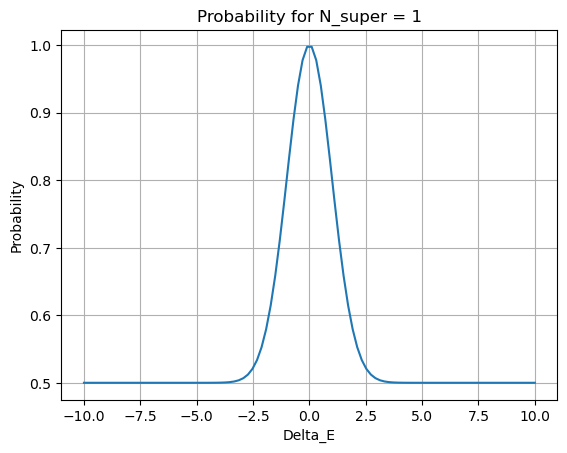

In [33]:
plt.grid()
plt.plot(DE_values, results)
plt.xlabel("Delta_E")
plt.ylabel("Probability")
plt.title("Probability for N_super = 1")

First, we can see if the noise level (success probability far away from 0) is affected by the number of super iterations.

C:\Users\sirac\AppData\Local\Temp\ipykernel_7780\2071971737.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(integrand, -np.inf, np.inf)


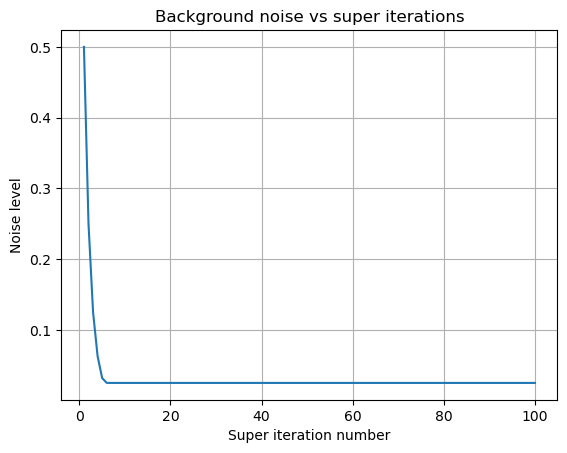

In [54]:
N_super_list = np.arange(1,101,1)
output = []
sigma = 1
for iterations in N_super_list:
    prob = calculate_integral(sigma, iterations, 50) # Assuming 100 is far enough from the energy
    output.append(prob)

plt.plot(N_super_list, output)
plt.xlabel("Super iteration number")
plt.ylabel("Noise level")
plt.title("Background noise vs super iterations")
plt.grid()

Text(0.5, 1.0, 'Probabilities with $\\sigma = $ 1')

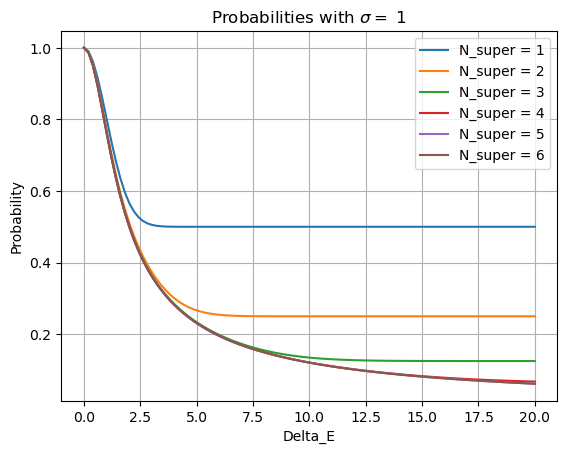

In [82]:
DE_values = np.linspace(0, 20, 100)
sigma = 1
N_super = 1
results1 = obtain_probabilities(sigma, N_super, DE_values)
N_super = 2
results2 = obtain_probabilities(sigma, N_super, DE_values)
N_super = 3
results3 = obtain_probabilities(sigma, N_super, DE_values)
N_super = 4
results4 = obtain_probabilities(sigma, N_super, DE_values)
N_super = 5
results5 = obtain_probabilities(sigma, N_super, DE_values)
N_super = 6
results6 = obtain_probabilities(sigma, N_super, DE_values)


plt.grid()
plt.plot(DE_values, results1, label = 'N_super = 1')
plt.plot(DE_values, results2, label = 'N_super = 2')
plt.plot(DE_values, results3, label = 'N_super = 3')
plt.plot(DE_values, results4, label = 'N_super = 4')
plt.plot(DE_values, results5, label = 'N_super = 5')
plt.plot(DE_values, results6, label = 'N_super = 6')
plt.xlabel("Delta_E")
plt.ylabel("Probability")
plt.legend()
plt.title(fr"Probabilities with $\sigma = $ {sigma}")

We can see that the noise value reaches approximately 0 (or at least as small as possible for scipy integrator to calculate) at N_super = 7, reaching a value of approximately 0.02486691970675818. Looking at the first few values in our output = 0.5, 0.25, 0.125, 0.0625, 0.03175... we can see that the noise scales as such:

$$P_{noise} (1, N_{super}) = \left(\frac{1}{2}\right)^{N_{super}}$$

This result is indepent of the $\sigma$ parameter, but the width of our peaks is dependent on the $\sigma$ parameter, so we can see how this is affected at different values. Since, for our purposes, we can see that after N_super = 7, we have no variation in the noise, we can set that as our value.

In [86]:
DE_values = np.linspace(0, 20, 100)
N_super = 7
sigma = 0.01
results1 = obtain_probabilities(sigma, N_super, DE_values)
sigma = 0.1
results2 = obtain_probabilities(sigma, N_super, DE_values)
sigma = 1
results3 = obtain_probabilities(sigma, N_super, DE_values)
sigma = 10
results4 = obtain_probabilities(sigma, N_super, DE_values)
sigma = 100
results5 = obtain_probabilities(sigma, N_super, DE_values)

C:\Users\sirac\AppData\Local\Temp\ipykernel_7780\2071971737.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(integrand, -np.inf, np.inf)
C:\Users\sirac\AppData\Local\Temp\ipykernel_7780\2071971737.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(integrand, -np.inf, np.inf)


Text(0.5, 1.0, 'Probability for N_super = 7')

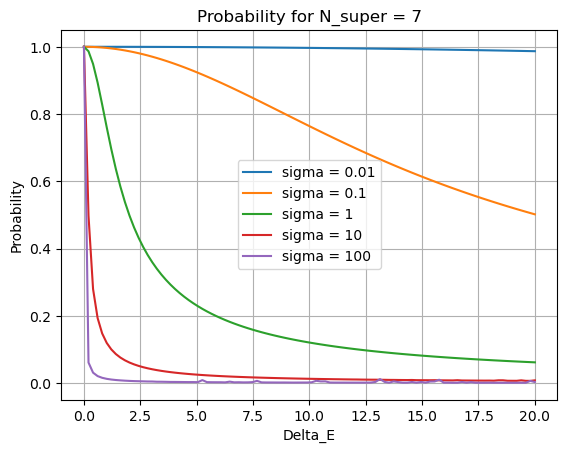

In [87]:
plt.grid()
plt.plot(DE_values, results1, label = 'sigma = 0.01')
plt.plot(DE_values, results2, label = 'sigma = 0.1')
plt.plot(DE_values, results3, label = 'sigma = 1')
plt.plot(DE_values, results4, label = 'sigma = 10')
plt.plot(DE_values, results5, label = 'sigma = 100')
plt.xlabel("Delta_E")
plt.ylabel("Probability")
plt.legend()
plt.title(fr"Probability for N_super = {N_super}")

This gives us an idea of how the width scales with sigma, and it is still proportional to $\frac{1}{\sigma}$, but we can see that it is not perfectly a Gaussian.

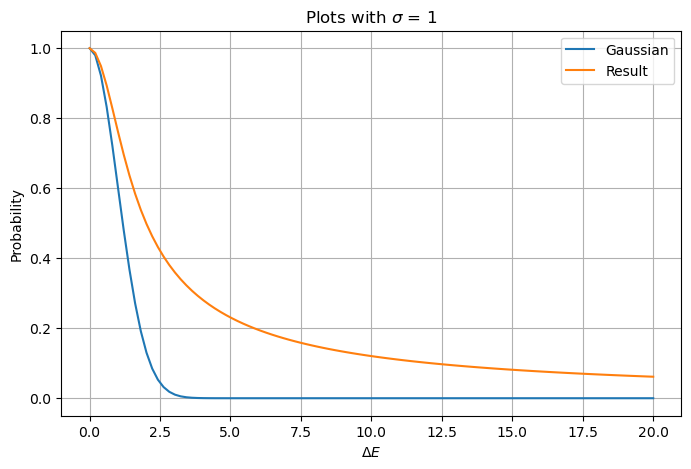

In [123]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(delta_e):
    return np.exp(-delta_e**2 / 2)

DE_values = np.linspace(0, 20, 100)
gaussian_values = gaussian(DE_values)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(DE_values, gaussian_values, label=r"Gaussian")
plt.plot(DE_values, results3, label = "Result")
plt.grid()
plt.xlabel(r"$\Delta E$")
plt.ylabel("Probability")
plt.title(fr"Plots with $\sigma$ = 1")
plt.legend()
plt.show()


Text(0.5, 1.0, 'Probability for N_super = 200')

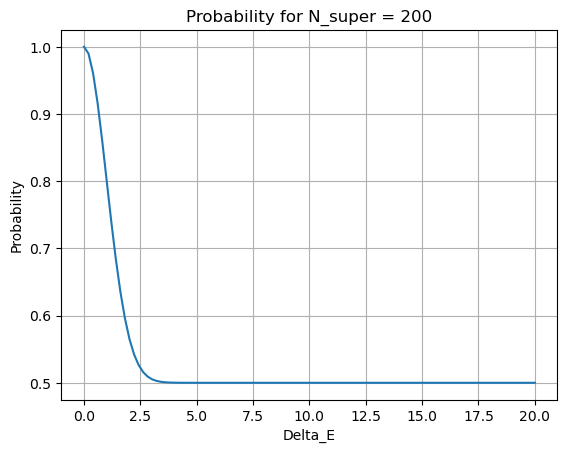

In [77]:
DE_values = np.linspace(0, 20, 100)
sigma = 1
N_super = 1
results = obtain_probabilities(sigma, N_super, DE_values)

plt.grid()
plt.plot(DE_values, results)
plt.xlabel("Delta_E")
plt.ylabel("Probability")
plt.title("Probability for N_super = 200")

In [22]:
results[-1]

0.12033141373156005